003-MOD09GA_061_20241029_插值填充_兰山嘴.csv
003-MOD09GA_061_20241106_插值填充_拖山.csv
003-MOD09GA_061_20241202_插值填充_乌龟山南.csv
003-MOD09GA_061_20241201_插值填充_五里湖心.csv
003-MOD09GA_061_20241128_插值填充_胥湖心.csv
003-MOD09GA_061_20241126_插值填充_锡东水厂.csv

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

station_name = "兰山嘴"
# 读取CSV文件
df = pd.read_csv(f'003-MOD09GA_061_20241029_{station_name}.csv')

# 将日期列转换为datetime格式
df['date'] = pd.to_datetime(df['date'])

# 重新计算FAI
df['fai'] = (df['b2'] - (df['b1'] + (df['b5'] - df['b1']) * (859 - 645) / (1240 - 645))) / \
            (df['b2'] + (df['b1'] + (df['b5'] - df['b1']) * (859 - 645) / (1240 - 645)))

# 获取日期范围
date_range = pd.date_range(start=df['date'].min(), end=df['date'].max(), freq='D')

# 创建完整的日期DataFrame
complete_df = pd.DataFrame({'date': date_range})

# 与原始数据合并，保留所有日期
df_filled = pd.merge(complete_df, df, on='date', how='left')

# 将缺失值填充为NaN
df_filled = df_filled.fillna(np.nan)

# 保存修正后的数据
df.to_csv(f'003-MOD09GA_061_20241029_{station_name}2.csv', index=False)


In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

station_name = "拖山"
# 读取CSV文件
df = pd.read_csv(f'003-MOD09GA_061_20241106_{station_name}.csv')

# 将日期列转换为datetime格式
df['date'] = pd.to_datetime(df['date'])

# 重新计算FAI
df['fai'] = (df['b2'] - (df['b1'] + (df['b5'] - df['b1']) * (859 - 645) / (1240 - 645))) / \
            (df['b2'] + (df['b1'] + (df['b5'] - df['b1']) * (859 - 645) / (1240 - 645)))

# 获取日期范围
date_range = pd.date_range(start=df['date'].min(), end=df['date'].max(), freq='D')

# 创建完整的日期DataFrame
complete_df = pd.DataFrame({'date': date_range})

# 与原始数据合并，保留所有日期
df_filled = pd.merge(complete_df, df, on='date', how='left')

# 将缺失值填充为NaN
df_filled = df_filled.fillna(np.nan)

# 保存修正后的数据
df.to_csv(f'003-MOD09GA_061_20241106_{station_name}2.csv', index=False)


成功读取兰山嘴站点的CSV文件
成功读取拖山站点的CSV文件
成功读取乌龟山南站点的CSV文件
成功读取五里湖心站点的CSV文件
成功读取胥湖心站点的CSV文件
成功读取锡东水厂站点的CSV文件

处理兰山嘴站点的异常值:
发现69个EVI异常值日期
发现4个NDVI异常值日期
发现4个NDCI异常值日期
发现0个NDWI异常值日期
发现0个NRFI异常值日期

处理拖山站点的异常值:
发现69个EVI异常值日期
发现4个NDVI异常值日期
发现4个NDCI异常值日期
发现0个NDWI异常值日期
发现0个NRFI异常值日期

处理乌龟山南站点的异常值:
发现129个EVI异常值日期
发现0个NDVI异常值日期
发现2个NDCI异常值日期
发现0个NDWI异常值日期
发现0个NRFI异常值日期

处理五里湖心站点的异常值:
发现71个EVI异常值日期
发现10个NDVI异常值日期
发现4个NDCI异常值日期
发现2个NDWI异常值日期
发现1个NRFI异常值日期

处理胥湖心站点的异常值:
发现109个EVI异常值日期
发现0个NDVI异常值日期
发现2个NDCI异常值日期
发现0个NDWI异常值日期
发现0个NRFI异常值日期

处理锡东水厂站点的异常值:
发现117个EVI异常值日期
发现0个NDVI异常值日期
发现4个NDCI异常值日期
发现0个NDWI异常值日期
发现0个NRFI异常值日期
正在绘制: NDCI随时间的变化


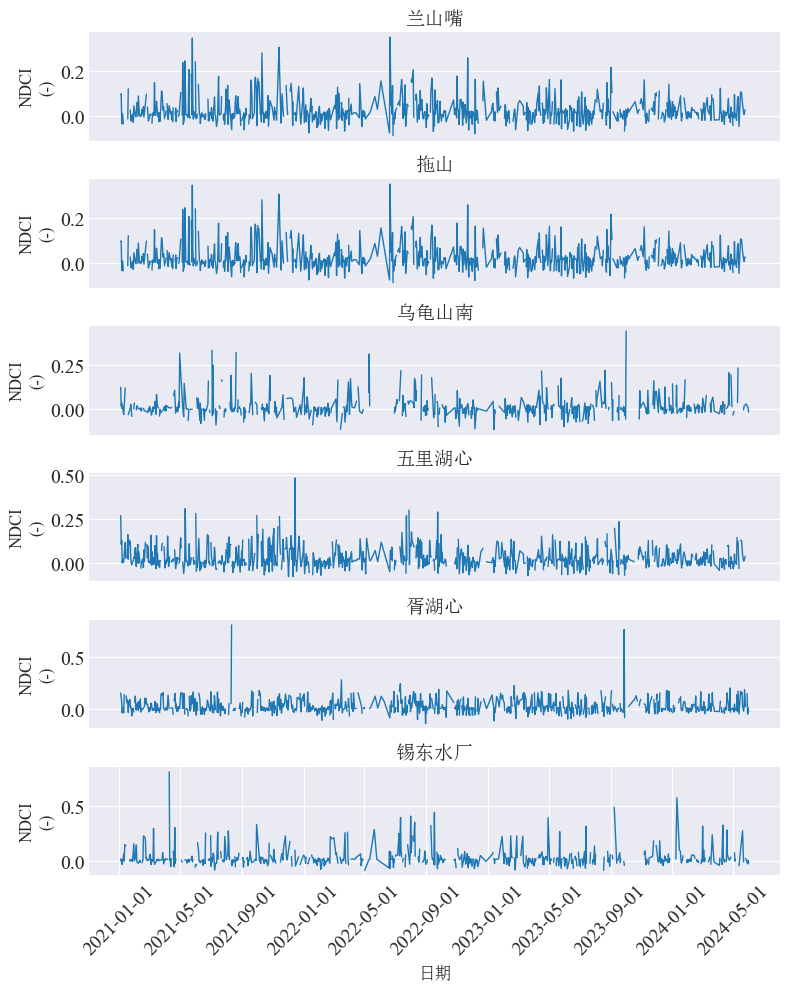

正在绘制: NDVI随时间的变化


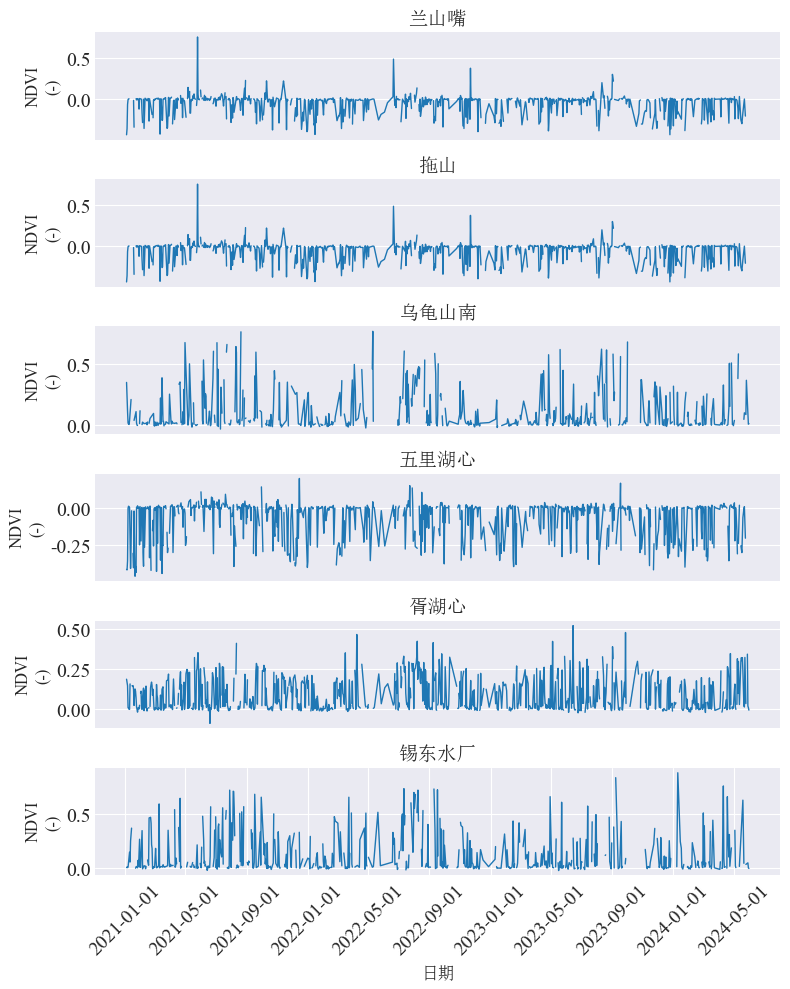

正在绘制: EVI随时间的变化


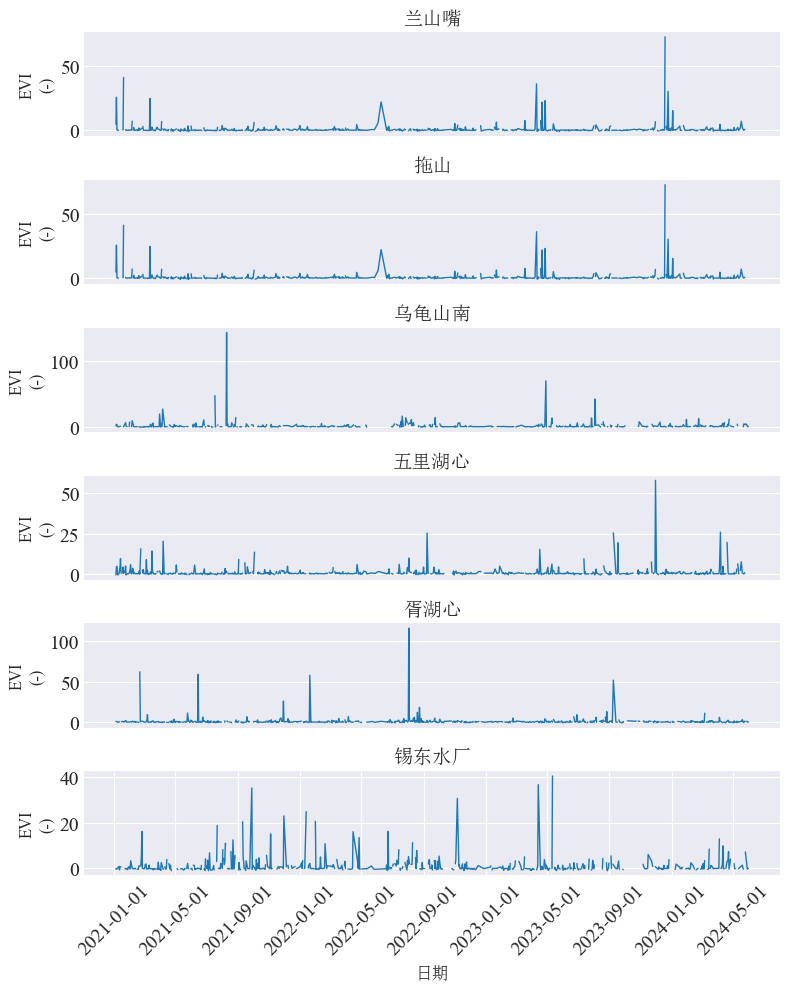

正在绘制: NDWI随时间的变化


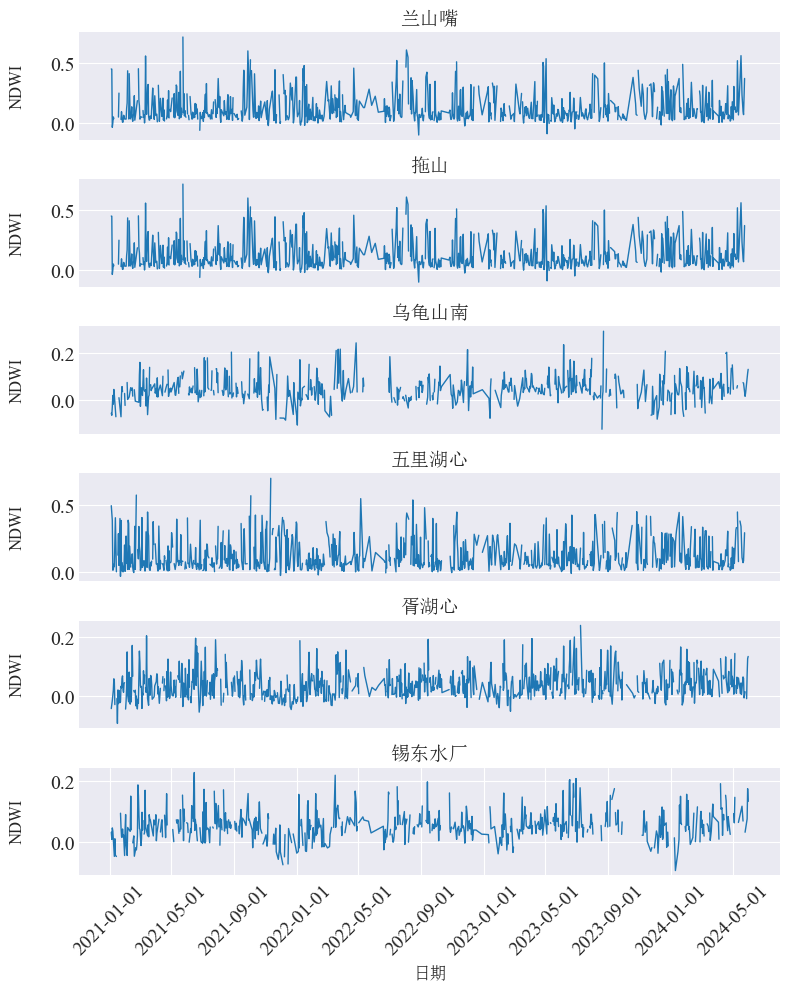

正在绘制: FAI随时间的变化


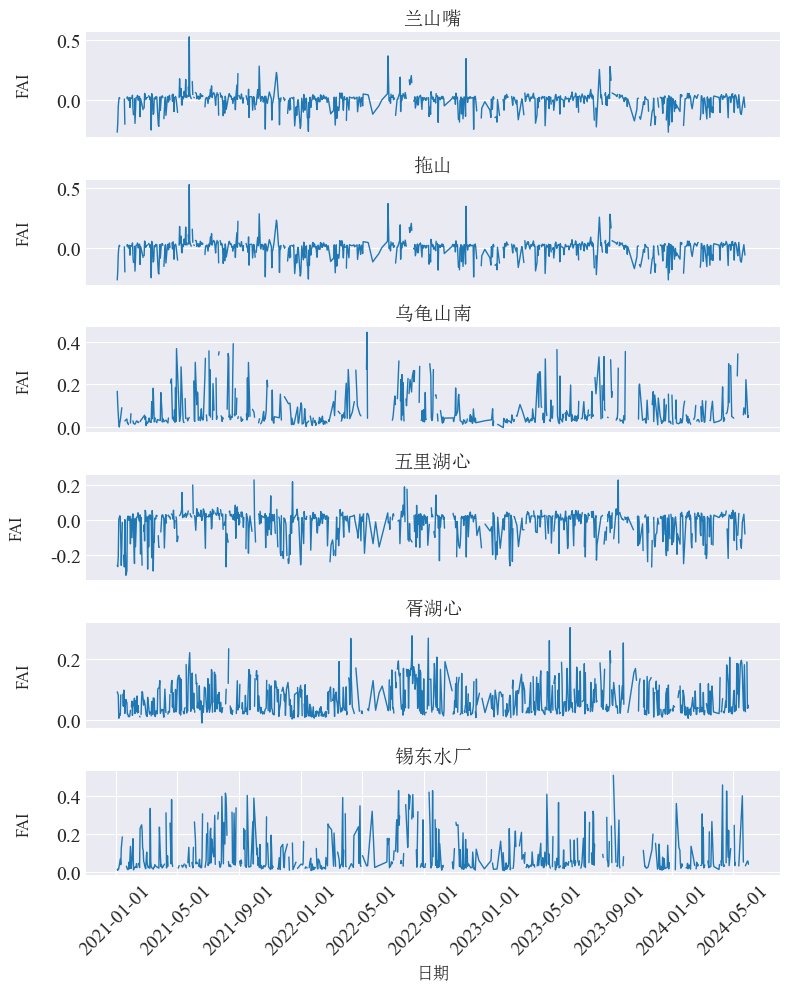

正在绘制: NRFI随时间的变化


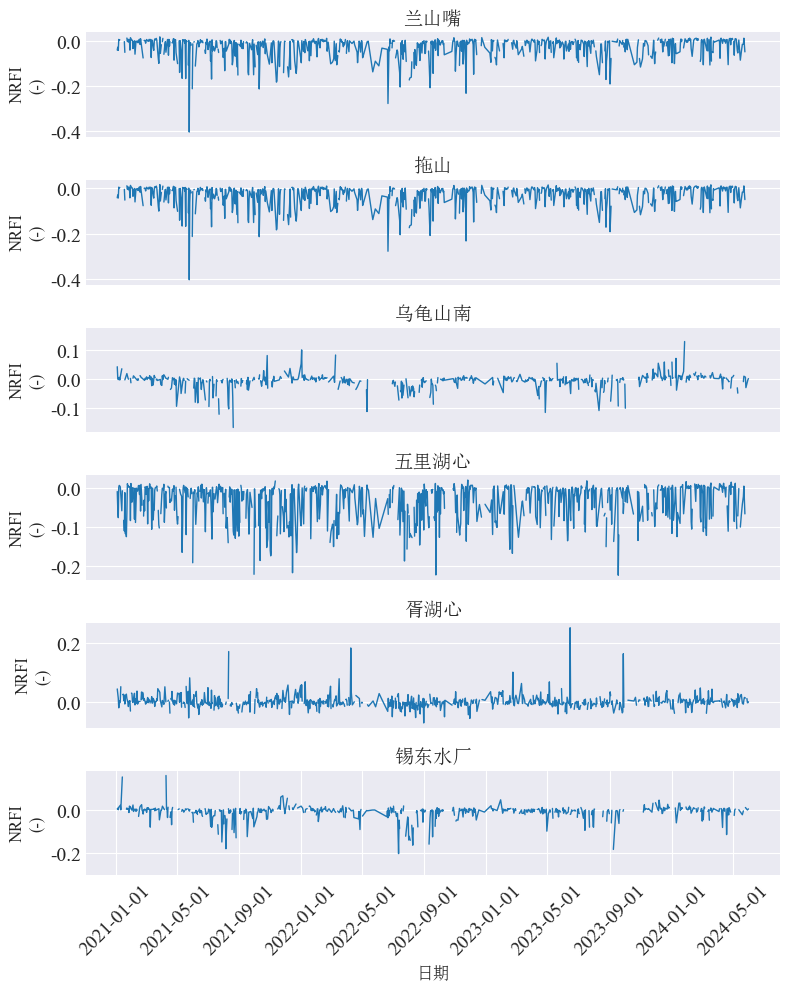

正在绘制: B1随时间的变化


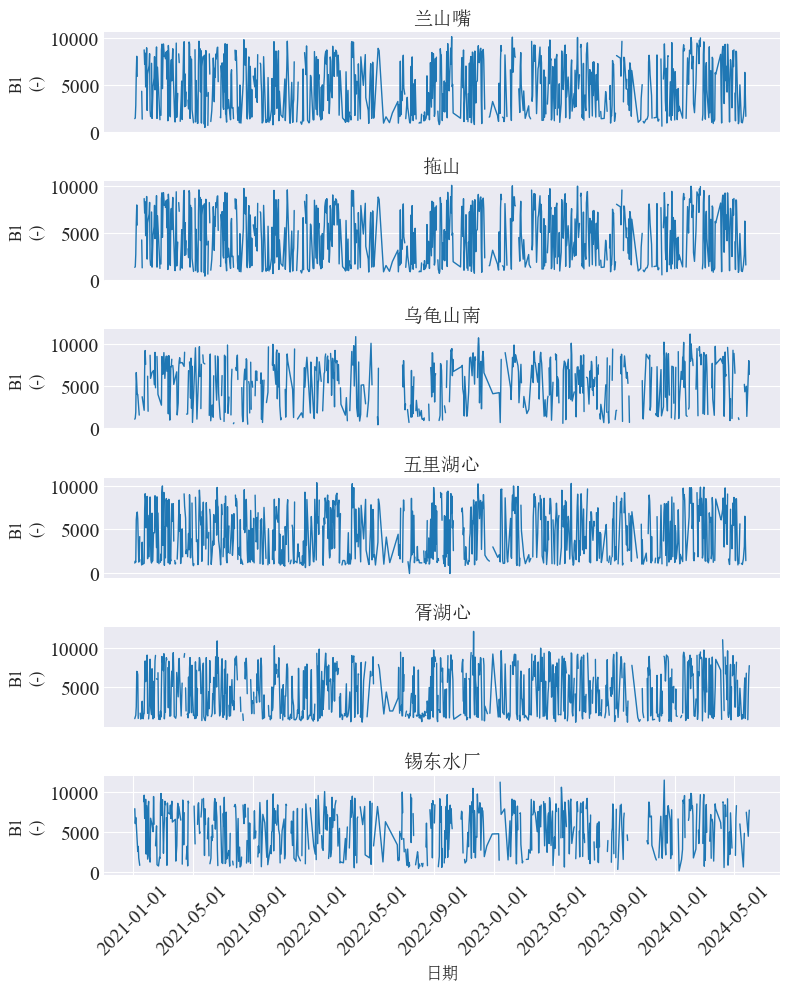

正在绘制: B2随时间的变化


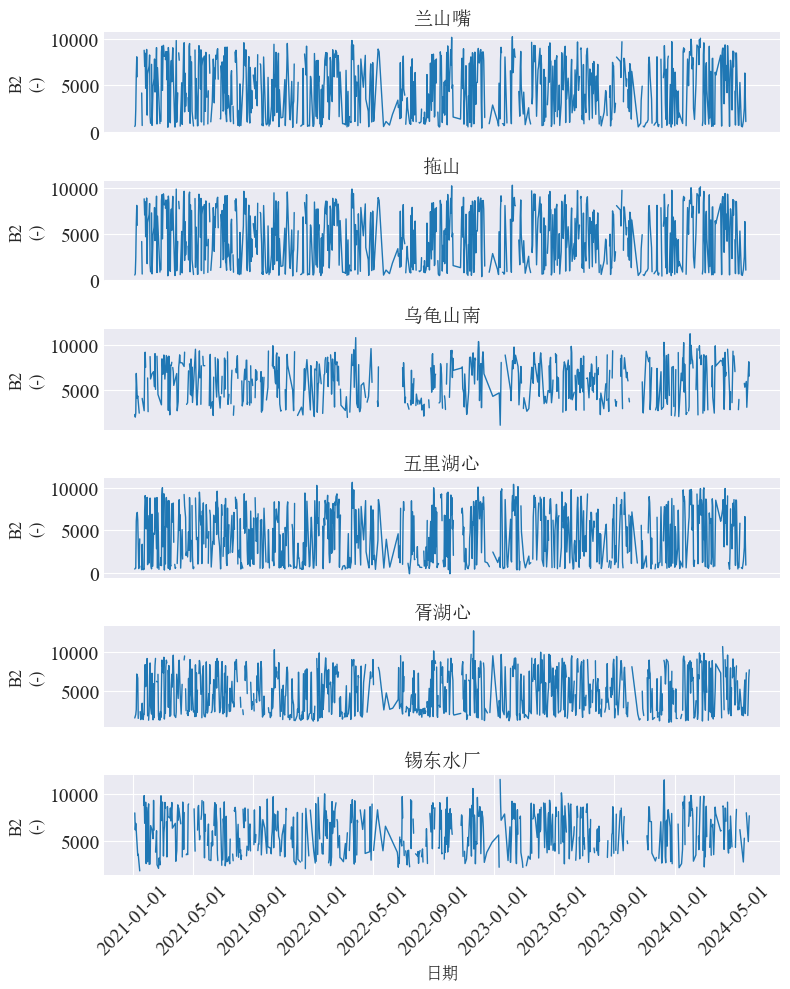

正在绘制: B3随时间的变化


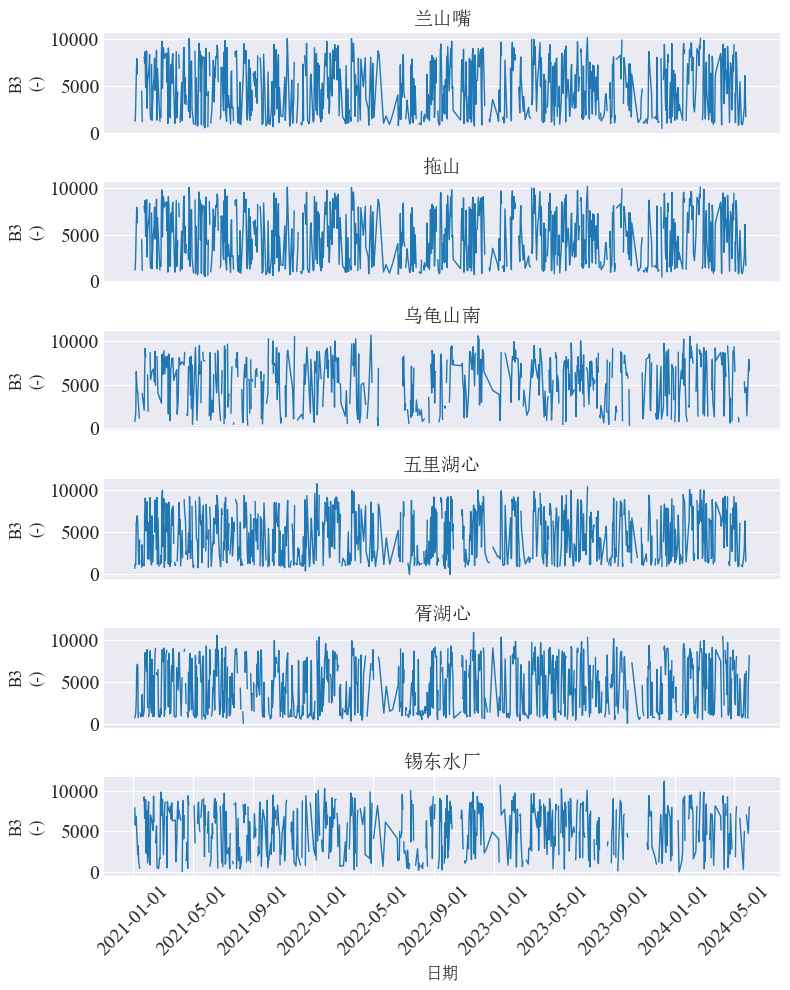

正在绘制: B4随时间的变化


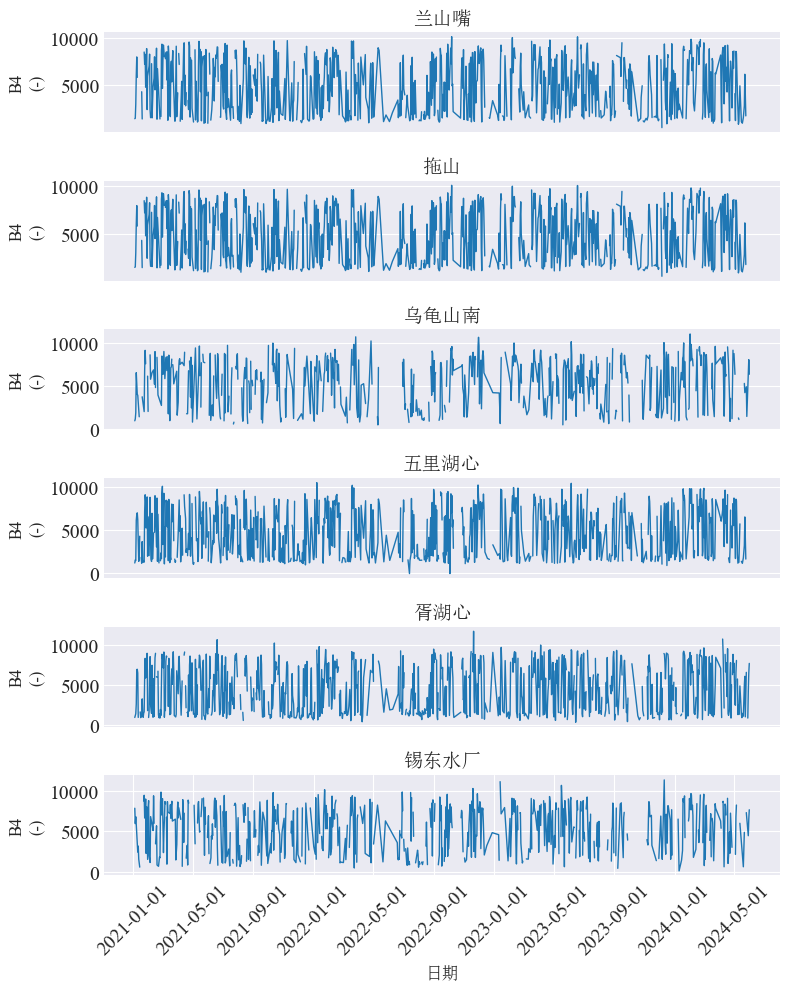

正在绘制: B5随时间的变化


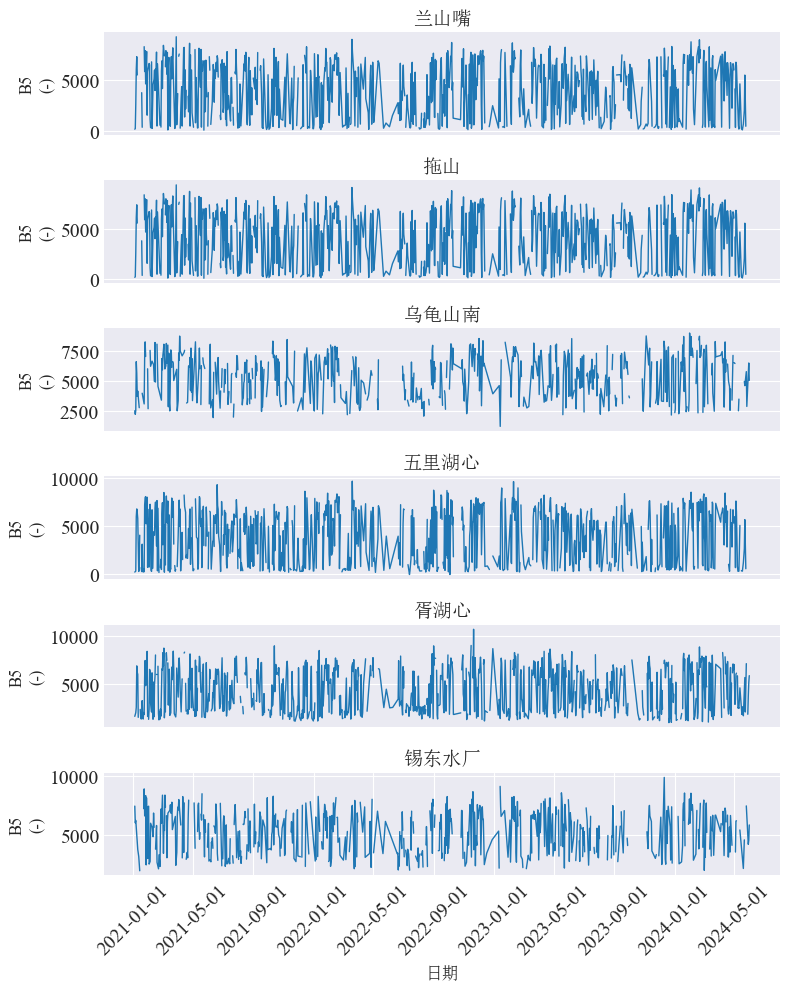

正在绘制: B6随时间的变化


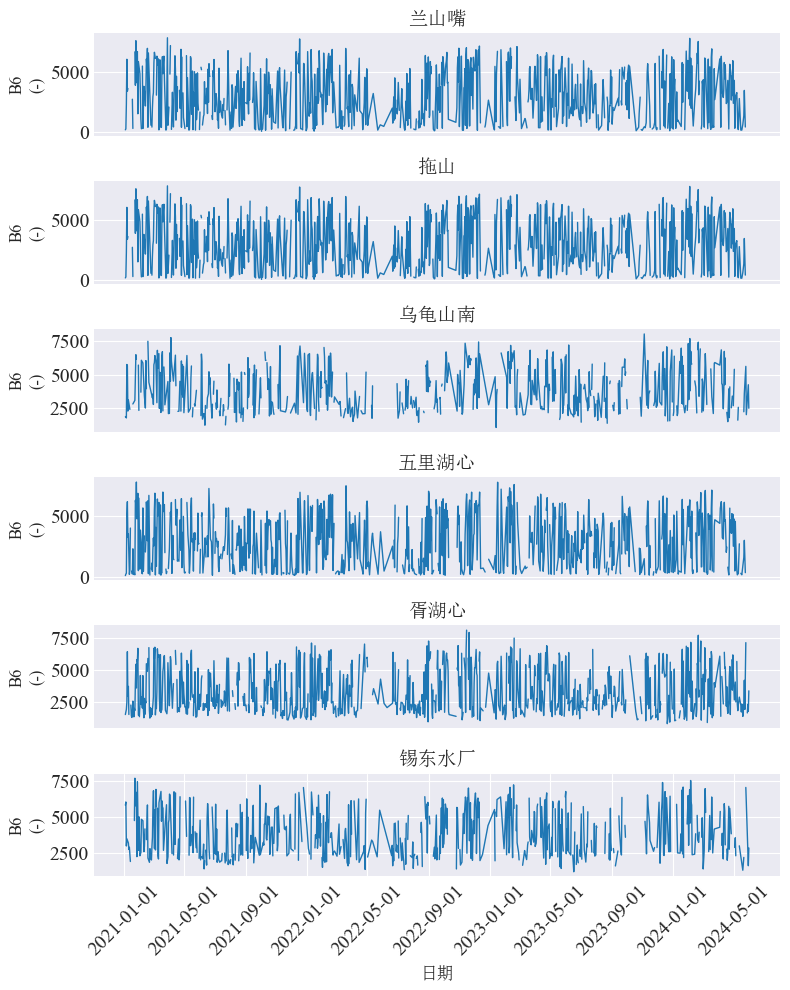

正在绘制: B7随时间的变化


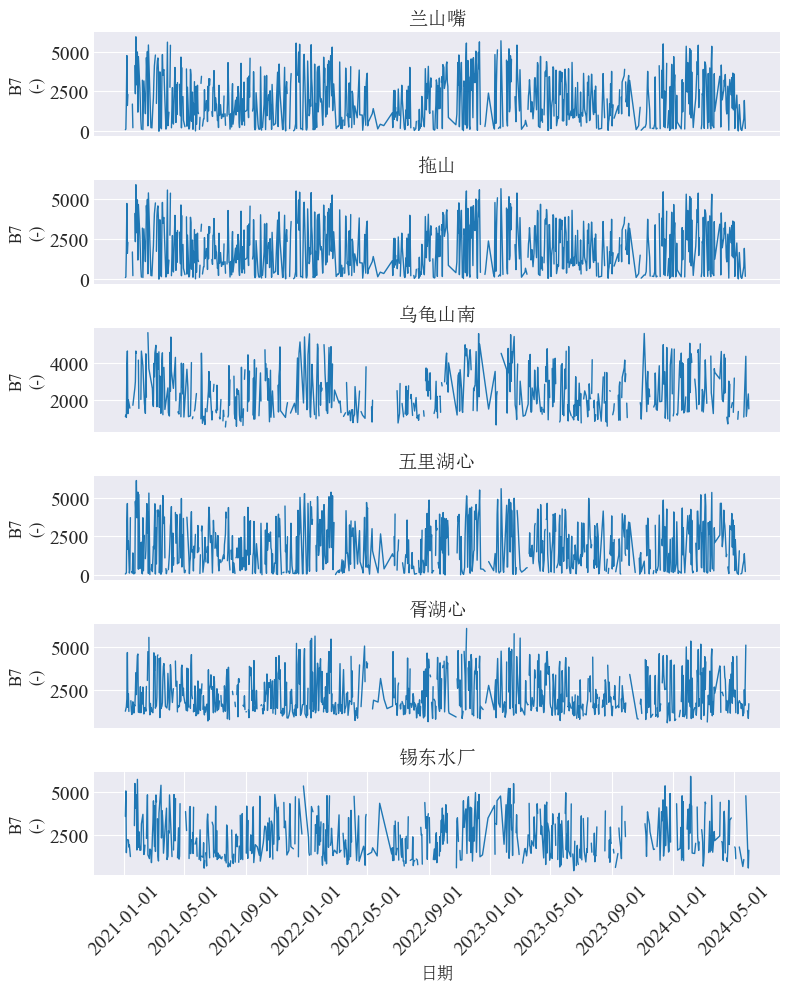

所有特征的时间序列图已生成完毕。


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
import matplotlib.font_manager as fm
import numpy as np

# 定义所有站点的信息
stations = [
    {'date': '20241029', 'name': '兰山嘴'},
    {'date': '20241106', 'name': '拖山'}, 
    {'date': '20241202', 'name': '乌龟山南'},
    {'date': '20241201', 'name': '五里湖心'},
    {'date': '20241128', 'name': '胥湖心'},
    {'date': '20241126', 'name': '锡东水厂'}
]

# 创建一个空的字典来存储每个站点的DataFrame
dfs = {}

# 读取每个站点的数据
for station in stations:
    file_date = station['date']
    station_name = station['name']
    interpolated_filename = f'003-MOD09GA_061_{file_date}_{station_name}.csv'
    
    try:
        df = pd.read_csv(interpolated_filename)
        df['date'] = pd.to_datetime(df['date'])
        # 将列名转为大写
        df.columns = [col.upper() if col != 'date' else col for col in df.columns]
        dfs[station_name] = df
        print(f"成功读取{station_name}站点的CSV文件")
    except FileNotFoundError:
        print(f"未找到{station_name}站点的CSV文件，请检查文件名和路径是否正确")
        raise

# 获取所有特征列名(大写)
features = df.columns.drop(['date'])

# 设置字体
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimSun', 'DejaVu Sans']  # 中文字体
plt.rcParams['font.serif'] = ['Times New Roman']  # 英文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

import numpy as np
# 定义异常值检测规则(使用大写的列名)
anomaly_rules = {
    'EVI': {'condition': lambda x: x < -1, 'name': 'EVI'},
    'NDVI': {'condition': lambda x: x < -1, 'name': 'NDVI'}, 
    'NDCI': {'condition': lambda x: (x > 1) | (x < -0.2), 'name': 'NDCI'},
    'NDWI': {'condition': lambda x: (x > 1) | (x < -1), 'name': 'NDWI'},
    'NRFI': {'condition': lambda x: x < -1, 'name': 'NRFI'}
}

# 对每个站点进行异常值检测和处理
for station_name, df in dfs.items():
    print(f"\n处理{station_name}站点的异常值:")
    # 遍历每个指标进行异常值检测和处理
    for index, rule in anomaly_rules.items():
        # 找出异常值日期
        anomaly_mask = rule['condition'](df[index])
        anomaly_dates = df[anomaly_mask]['date']
        print(f"发现{len(anomaly_dates)}个{rule['name']}异常值日期")
        
        # 将异常日期对应的所有特征值设置为NaN
        df.loc[df['date'].isin(anomaly_dates), df.columns != 'date'] = np.nan

# 分别设置中英文字体
chinese_font = fm.FontProperties(fname='/root/Download/Modis-algae-aliyun/AlgaeBloomForecast-20241122/SIMSUN.TTC', size=14)
english_font = fm.FontProperties(fname='/root/Download/Modis-algae-aliyun/AlgaeBloomForecast-20241122/TIMES.TTF', size=14)

# 设置图表样式
plt.style.use('seaborn-v0_8-darkgrid')

# 特征单位映射字典(使用大写的特征名)
feature_units = {
    'B1': '(-)',
    'B2': '(-)', 
    'B3': '(-)',
    'B4': '(-)',
    'B5': '(-)',
    'B6': '(-)',
    'B7': '(-)',
    'EVI': '(-)',
    'NDVI': '(-)',
    'NDCI': '(-)',
    'NRFI': '(-)',
    'DENSITY': '(cells/L)'
}

# 站点名称映射
station_name_map = {
    '兰山嘴': '兰山嘴',
    '拖山': '拖山',
    '乌龟山南': '乌龟山南',
    '五里湖心': '五里湖心',
    '胥湖心': '胥湖心',
    '锡东水厂': '锡东水厂'
}

# 为每个特征创建单独的图表
for feature in features:
    fig, axes = plt.subplots(6, 1, figsize=(8,10))
    print(f'正在绘制: {feature}随时间的变化')
    
    # 使用单一颜色 - 深蓝色
    line_color = '#1f77b4'
    
    for idx, (station, df) in enumerate(dfs.items()):
        ax = axes[idx]
        ax.plot(df['date'], df[feature], linewidth=1, color=line_color)
        
        # 获取显示用的站点名
        display_name = station_name_map.get(station, station)
        
        unit = feature_units.get(feature, '')
        ax.set_title(f'{display_name}', fontproperties=chinese_font, fontsize=14)
        
        # 只在最后一个subplot显示x轴标签和刻度
        if idx < 5:
            ax.set_xticks([])  # 删除x轴刻度
            ax.set_xlabel('')  # 删除x轴标签
        else:
            ax.set_xlabel('日期', fontproperties=chinese_font, fontsize=12)
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
            ax.xaxis.set_major_locator(mdates.AutoDateLocator())
            ax.tick_params(axis='x', rotation=45)
            
        ax.set_ylabel(f'{feature}\n{unit}', fontproperties=english_font, fontsize=12)
        
        # 设置刻度标签字体
        ax.tick_params(axis='both', which='major', labelsize=10)
        for label in ax.get_yticklabels():  # 只设置y轴标签字体
            label.set_fontproperties(english_font)
        
        if idx == 5:  # 为最后一个subplot设置x轴标签字体
            for label in ax.get_xticklabels():
                label.set_fontproperties(english_font)
    
    plt.tight_layout()
    plt.show()

print("所有特征的时间序列图已生成完毕。")
